<a href="https://colab.research.google.com/github/EeraboinaKeerthi/Supervised_Learning/blob/main/LaptopPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import os
# List the main "My Drive" folder
print(os.listdir('/content/drive/My Drive/'))

['Colab Notebooks', 'texas-application-employment.pdf', 'texas-application-employment (1).gdoc', 'texas-application-employment.gdoc', 'datasets']


In [150]:
import pandas as pd
train_data = pd.read_json('/content/drive/My Drive/datasets/LaptopPrice/train_dataset.json')

val_data = pd.read_json('/content/drive/My Drive/datasets/LaptopPrice/val_dataset.json')

test_data = pd.read_json('/content/drive/My Drive/datasets/LaptopPrice/test_dataset.json')

In [151]:
df = pd.concat([train_data, val_data, test_data], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [152]:
df.dtypes

,0
graphic card type,object
communications,object
resolution (px),object
CPU cores,object
RAM size,object
operating system,object
drive type,object
input devices,object
multimedia,object
RAM type,object


In [153]:
df.shape

(7853, 17)

In [154]:
df.isnull().sum()

,0
graphic card type,496
communications,782
resolution (px),608
CPU cores,0
RAM size,450
operating system,650
drive type,435
input devices,678
multimedia,708
RAM type,864


**Why Check Unique Values During EDA?**

Determine Feature Type
Helps identify whether a column is categorical, binary, or continuous.

Detect High Cardinality
Flags columns with too many unique values, which may cause overfitting or encoding issues.

Find Binary Columns
Reveals columns with only 2 values, which can be encoded simply (e.g., 0/1).

Identify Low-Variance Columns
Columns with only 1 value are uninformative and can be dropped.

Spot Data Quality Issues
Catches inconsistencies like "SSD" vs "ssd " or "Windows" vs "windows".

Plan Encoding Strategy
Guides whether to use One-Hot, Label Encoding, or custom grouping.



In [155]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"{col}: contains lists")
    else:
        print(f"{col}: {df[col].nunique()} unique values")



graphic card type: 2 unique values
communications: contains lists
resolution (px): 13 unique values
CPU cores: 7 unique values
RAM size: 11 unique values
operating system: contains lists
drive type: 5 unique values
input devices: contains lists
multimedia: contains lists
RAM type: 3 unique values
CPU clock speed (GHz): 45 unique values
CPU model: 18 unique values
state: 1 unique values
drive memory size (GB): 72 unique values
warranty: 3 unique values
screen size: 6 unique values
buynow_price: 1882 unique values


Identify Low-Variance Columns Columns with only 1 value are uninformative and can be dropped.

state only takes one value, we can drop state column since it won't effect the price

In [156]:
df = df.drop(columns=['state'])
df = df.dropna()

**Why Extract Unique Values from List-Type Columns?**

To prepare data for machine learning models, which cannot handle list objects or raw text features directly.

Columns like communications, input devices, and multimedia look like:

communications
['Wi-Fi', 'Bluetooth']
['Ethernet']
['Wi-Fi']

We can’t feed these directly into ML models. So, we extract all unique items.
Once you have the unique values, you can create binary columns for each.
This makes data numeric and model-ready.

In [157]:
# These are the columns which are in list format, we extract unique values from them.
compact_cols = ['communications', 'input devices', 'multimedia']

In [158]:
df[compact_cols].head()

,communications,input devices,multimedia
7233,"[bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"
5845,"[wi-fi, bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
5897,"[wi-fi, bluetooth]","[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]"
4870,"[wi-fi, bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
2498,"[wi-fi, bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"


In [159]:
pd.DataFrame(df['communications'].to_list()) # use to_list( ) function to split lists into columns

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [160]:
# get unique values of each features in our predefined lists
# and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [161]:
compact_dict = {col: [] for  col in compact_cols}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

In [162]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

Use regex=True (pattern match) : We want to remove all instances of ' gb' — pattern can apply broadly

Use regex=False (literal match) : We want to replace only exact "256 mb" — not anything like "512 mb"

Remove ' gb'	To isolate numeric part of the string
Replace '256 mb'	To standardize all memory units to GB


In [163]:
# transform string value to integer by excluding gb and mb
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)

# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df['RAM size'].head()


,RAM size
7233,32
5845,8
5897,8
4870,8
2498,8


In [164]:
# screen size column is given as intervals.
# convert it as integers such as so 11.9" and less would become 11
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df['screen size'].head(10)

,screen size
7233,17
5845,15
5897,12
4870,15
2498,17
6220,15
11640,15
7771,15
9024,15
7469,15


In [165]:
# split resolution (px) column into two columns of integers (resolution_x and resolution_y)
# as 1280 x 800 would have 1280 in the first column and 800 in the second column
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [166]:
# resolution (px) is divided into resolution_x and resolution_y
# drop resolution (px)
df = df.drop(columns=['resolution (px)'])

In [167]:
df.dtypes

,0
graphic card type,object
communications,object
CPU cores,object
RAM size,object
operating system,object
drive type,object
input devices,object
multimedia,object
RAM type,object
CPU clock speed (GHz),float64


In [168]:
# put all numerical columns together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


In [169]:
# use get_dummies( ) from pandas library to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


In [170]:
# apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)

dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [171]:
# put unique_vals to compact_df columns
import numpy as np
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [173]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [174]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns]).astype(int)
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


In [175]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


**Multicollinearity Check?**

Multicollinearity occurs when two or more independent variables (features) in  dataset are highly correlated with each other.

The model has a hard time deciding which feature is more important.
It distributes weight inconsistently between correlated features.
If two features are strongly correlated, and both are in the model, it's unclear which one truly affects the target.


**VIF (Variance Inflation Factor)?**
VIF tells you how much a feature is linearly predictable from the other features.

If VIF = 1 → the feature is not correlated with others.

If VIF = 10 → the variance of the coefficient is 10 times larger than it would be with no correlation.

High VIF → unstable and unreliable model coefficients.

Helps decide which features to keep/drop in linear models
We will eliminate all features that have VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [176]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)


In [178]:
# apply VIF computation to all columns
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120751
...,...,...
63,intel core i7,inf
64,intel core m,inf
65,intel pentium dual-core,inf
66,intel pentium quad-core,inf


In [179]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("removing features with high VIF , VIF>20", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

removing features with high VIF , VIF>20 other CPU
removing features with high VIF , VIF>20 ddr3l
removing features with high VIF , VIF>20 hybrid
removing features with high VIF , VIF>20 warranty_seller warranty
removing features with high VIF , VIF>20 graphic card type_dedicated graphics
removing features with high VIF , VIF>20 resolution_x
removing features with high VIF , VIF>20 touchpad
removing features with high VIF , VIF>20 screen size
removing features with high VIF , VIF>20 CPU clock speed (GHz)
removing features with high VIF , VIF>20 camera
removing features with high VIF , VIF>20 windows 10 home
removing features with high VIF , VIF>20 intel core i5
removing features with high VIF , VIF>20 ssd
removing features with high VIF , VIF>20 keyboard
removing features with high VIF , VIF>20 bluetooth
removing features with high VIF , VIF>20 resolution_y
removing features with high VIF , VIF>20 CPU cores


,feature,VIF
0,windows 8.1 professional 32-bit,1.004142
1,windows 7 home 64-bit,1.007555
2,intel celeron m,1.017650
3,windows 7 professional 32-bit,1.021663
4,intel core m,1.027893
5,windows 8.1 home 32-bit,1.029210
6,amd a4,1.033996
7,amd a10,1.035086
8,amd e1,1.035688
9,amd a12,1.053704


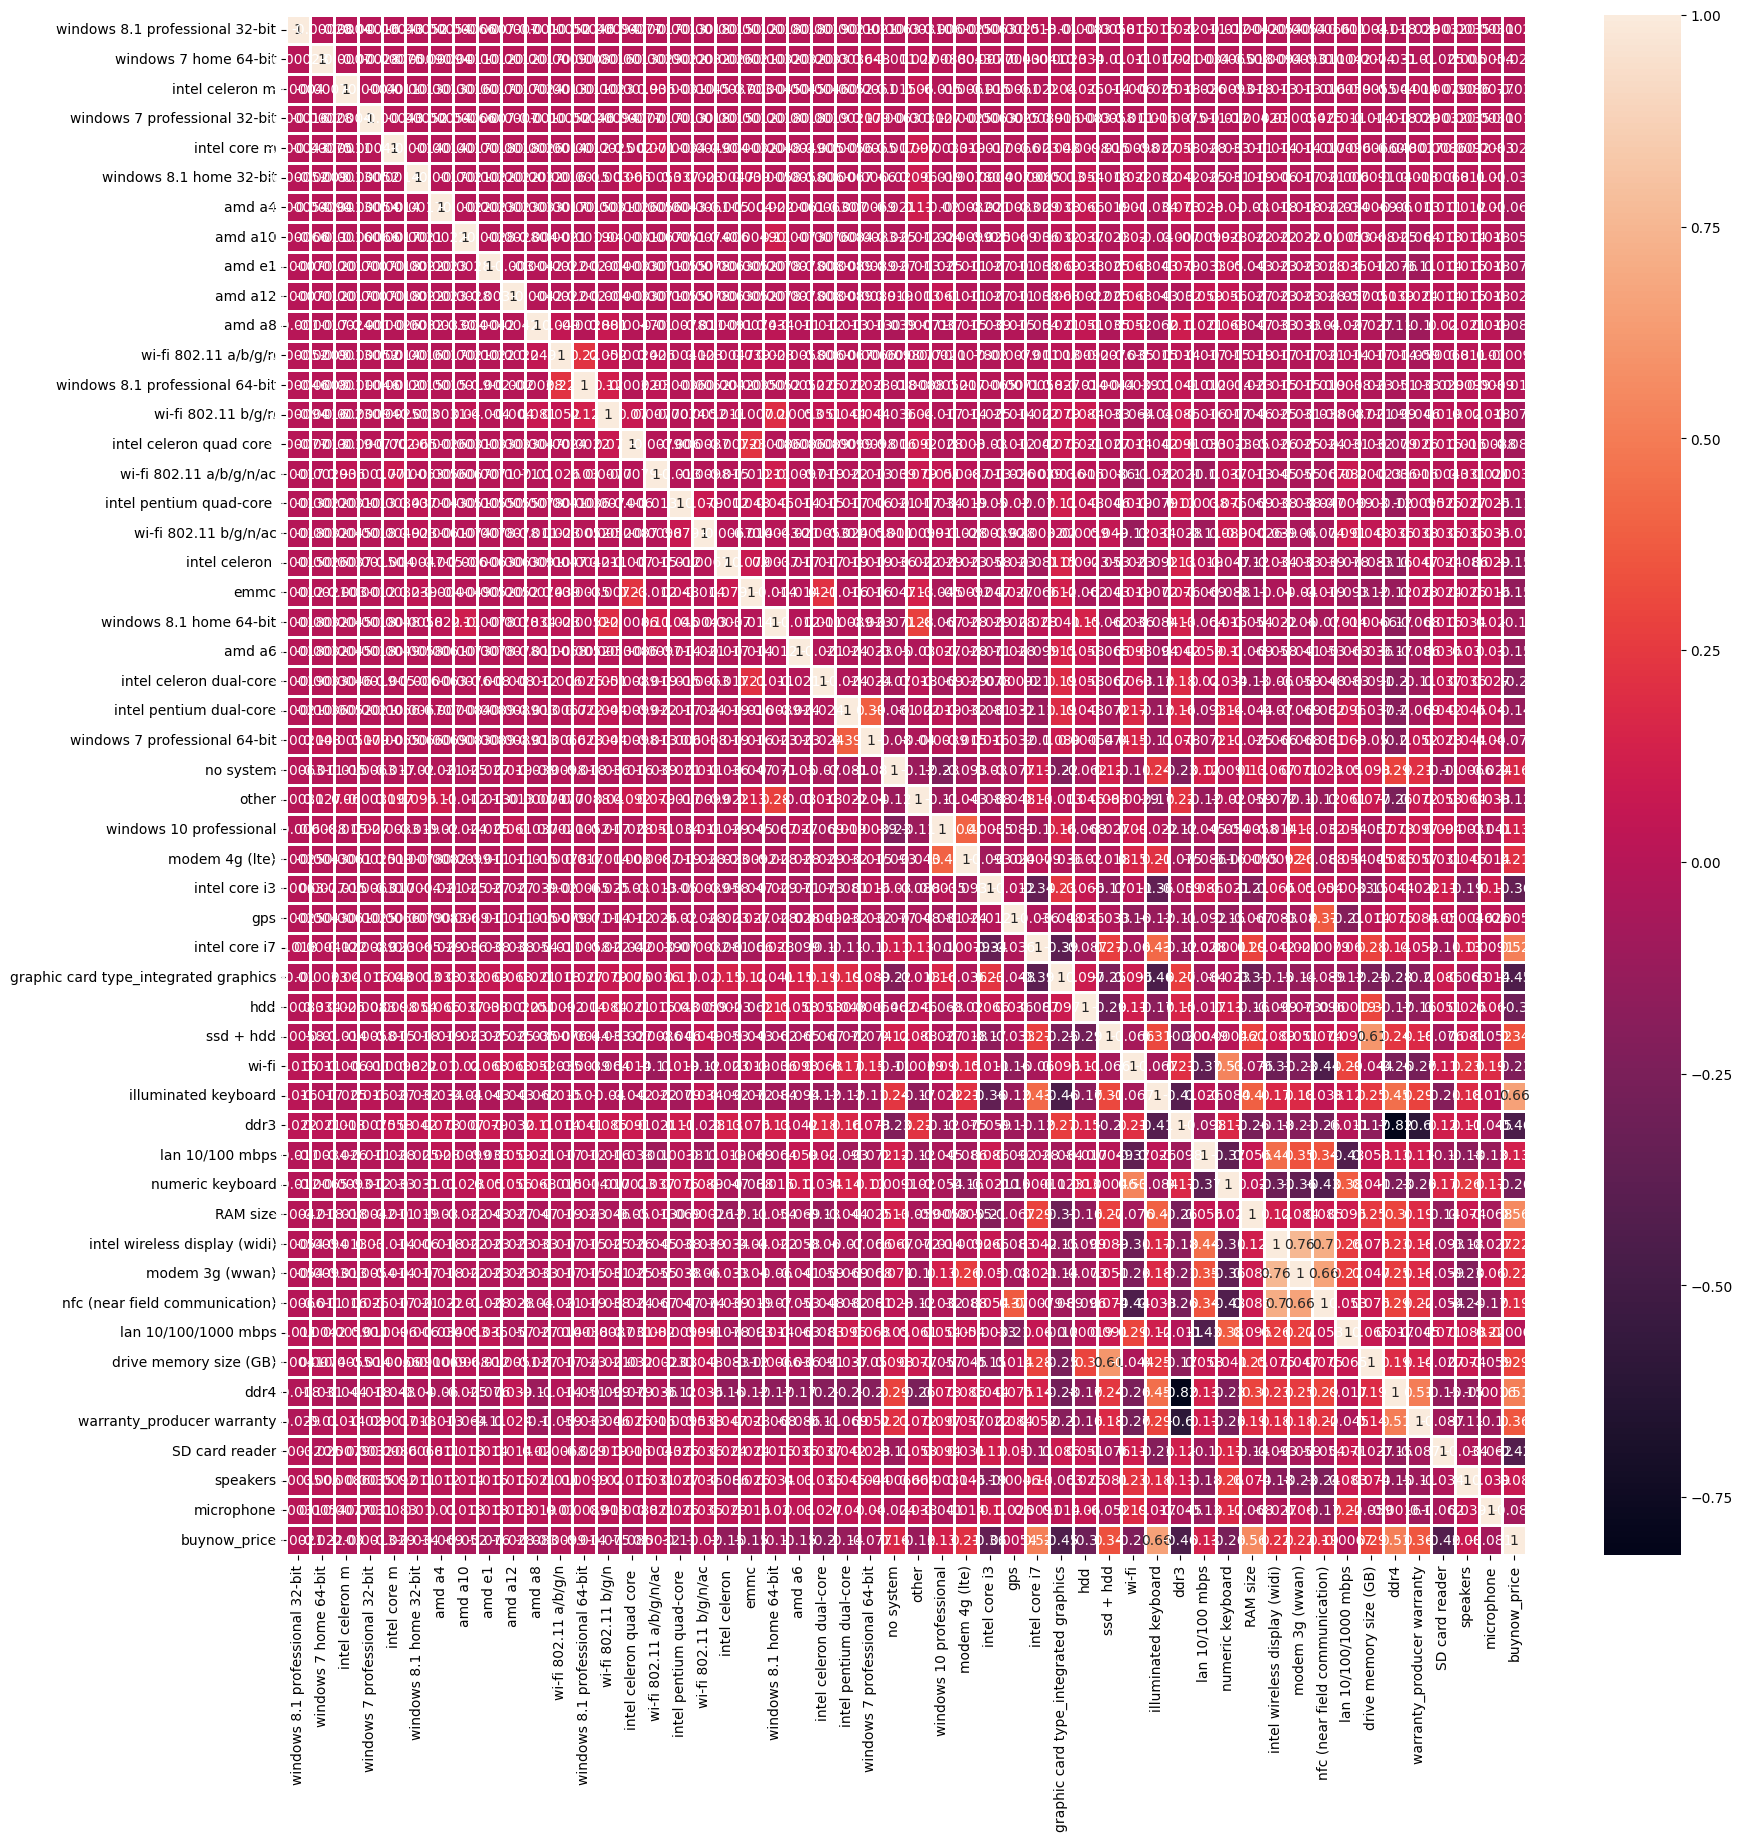

In [180]:
import seaborn as sns
from matplotlib import pyplot as plt
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

In [181]:
# use the indeces of given datasets to properly separate it again as initial datasets
train_indeces = train_data.dropna().index
val_indeces = val_data.dropna().index
test_indeces = test_data.dropna().index

In [182]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [183]:
# sklearn machine learning models expect y_train, y_test, y_val
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()


In [184]:
X_train.shape

(3694, 51)

In [185]:
y_train.shape

(3694,)

Linear : 788.947492963045
MLP : 805.734092640715
DecisionTree : 776.4062785247202
RandomForest : 620.2248983092658
GradientBoosting : 606.5929238815638
ExtraTrees : 692.7011317743826


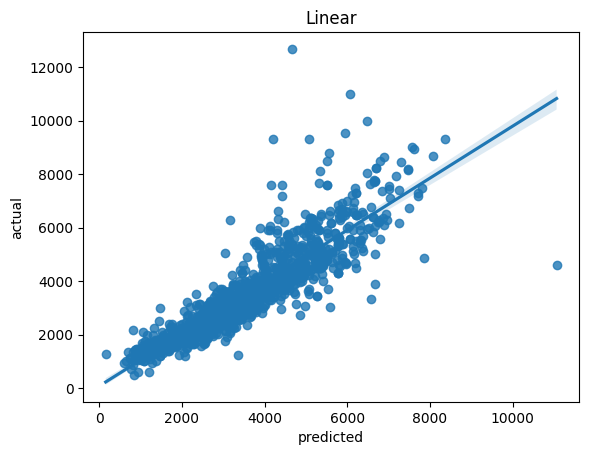

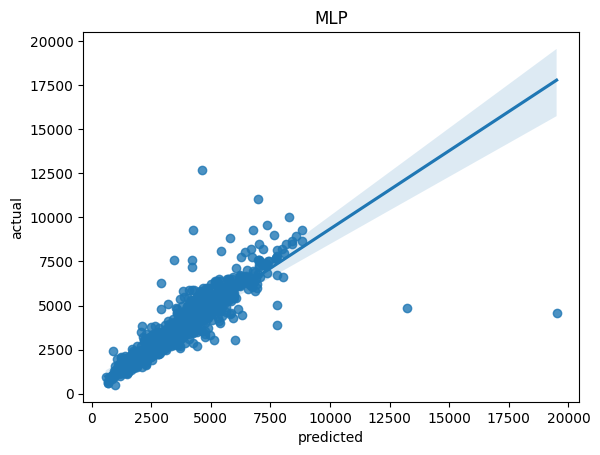

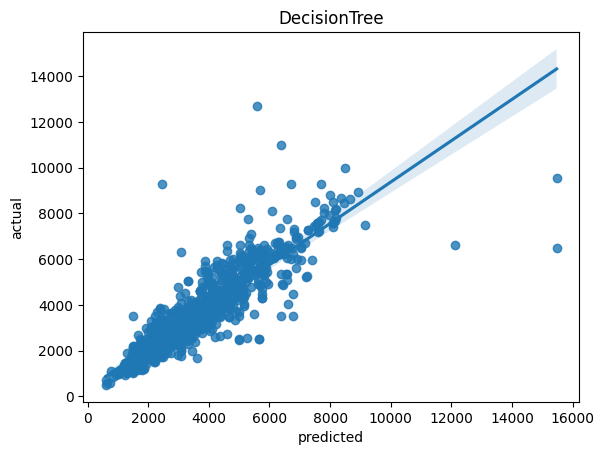

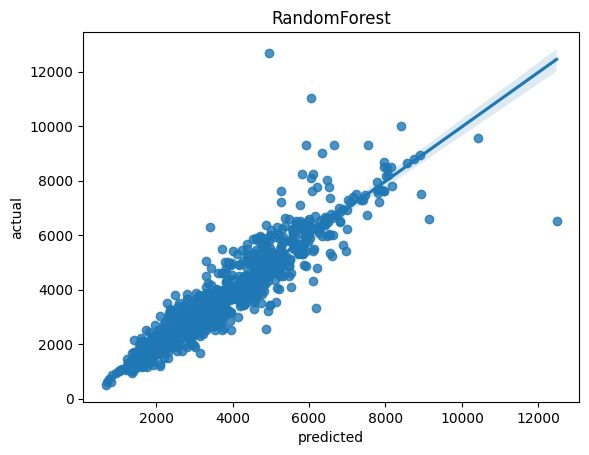

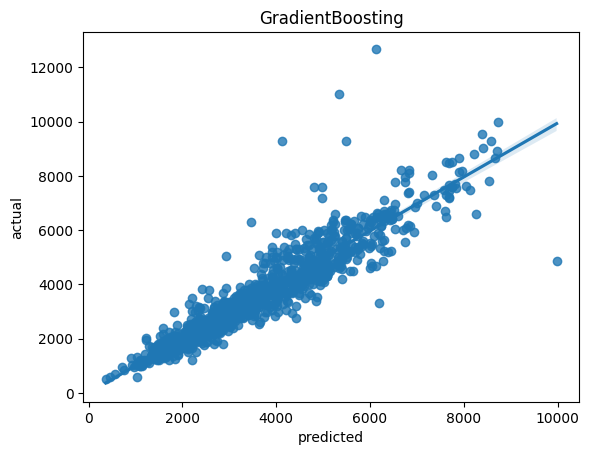

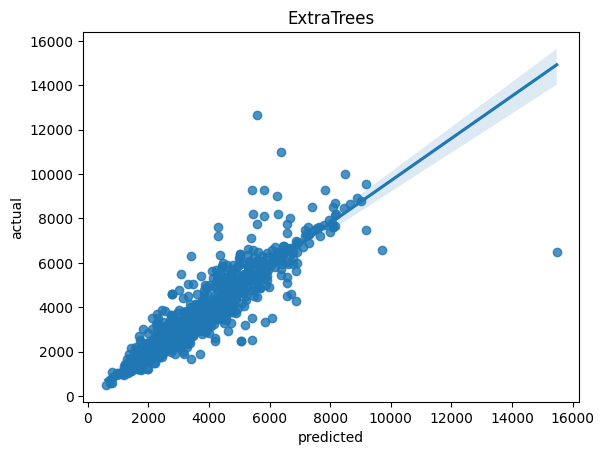

In [192]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

def rmse(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)


def regression(regressor_name, regressor):
#     alternative scaler
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train)
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)

regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

Choose: GradientBoostingRegressor
It has the lowest RMSE (606.59),it predicts your target (buynow_price) with the least average error across all models tested.

Voting : 584.423261789566


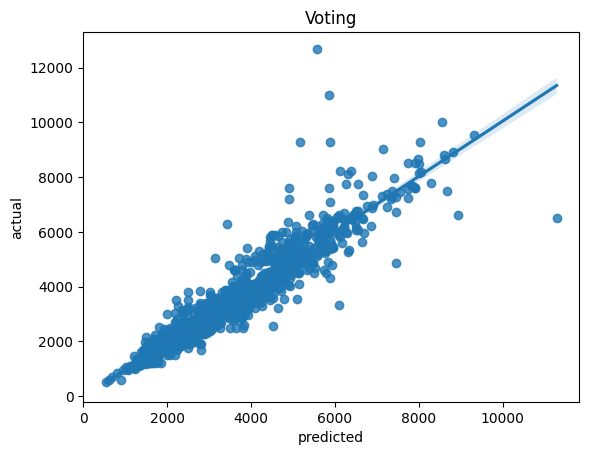

In [193]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.25, 0.35]))

Voting : 584.423261789566 is the RMSE (Root Mean Squared Error) of your Voting Regressor on the test set.

In [194]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2492.187813,2330.630495,2369.000000,2346.756667,2569.864560,2369.000,2441.560657
1,2299.00,2386.752352,2121.717561,2149.000000,2298.435714,2138.076912,2299.000,2234.433265
2,5999.00,5081.473795,5023.199395,5072.076923,5003.482143,5163.698950,4999.000,5066.448330
3,1299.00,1146.305154,1235.574332,1247.812500,1262.720040,1322.106347,1261.500,1286.169552
4,3329.00,6576.882698,4983.036799,4859.000000,6178.002835,6199.711059,5851.300,6105.010416
...,...,...,...,...,...,...,...,...
1195,5599.00,5793.154948,5660.092059,5809.000000,5679.553571,5850.127311,5674.000,5746.394674
1196,2925.36,3067.689408,2704.778478,2931.917500,2905.551142,2763.286092,2928.010,2854.259837
1197,3799.00,4268.311121,4133.045701,4361.181818,4483.654714,4088.933822,4483.520,4325.732679
1198,5589.00,5121.924235,5183.439871,4616.333333,4866.666667,5201.925000,4376.145,4878.139584


In [203]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)


# define the error metric using keras background
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

# define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return float(lr * tf.math.exp(-0.01).numpy())



# define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

# define complex model architecture
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

In [204]:
# compile base model
dnn_model = build_and_compile_base_model()


In [205]:
dnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 51)             │           103 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696 (14.44 KB)

 Trainable params: 3,593 (14.04 KB)

 Non-trainable params: 103 (416.00 B)

In [206]:
# initialize scheduler and early stopping callback
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)

# train base model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=300)

Epoch 1/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2963.1130 - val_loss: 2171.1758 - learning_rate: 0.0050
Epoch 2/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2211.9373 - val_loss: 2073.3308 - learning_rate: 0.0050
Epoch 3/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2092.3022 - val_loss: 1885.6350 - learning_rate: 0.0050
Epoch 4/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1800.4105 - val_loss: 1379.1000 - learning_rate: 0.0050
Epoch 5/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1358.8374 - val_loss: 1231.1353 - learning_rate: 0.0050
Epoch 6/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1292.3632 - val_loss: 1193.3892 - learning_rate: 0.0050
Epoch 7/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1229.1787 - val_loss: 1126.2321 - learning_rate: 0.0050
Epoch 8/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1171.6818 - val_loss: 1077.3766 - learning_rate: 0.0050
Epoch 9/300
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11

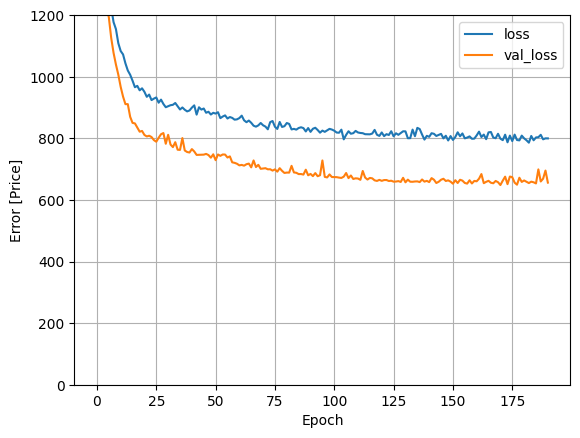

In [207]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [208]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 730.9928


743.471435546875

In [209]:
# compile complex model
dnn_model = build_and_compile_complex_model()

In [210]:
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 51)             │           103 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,032 (15.75 KB)

 Trainable params: 3,929 (15.35 KB)

 Non-trainable params: 103 (416.00 B)

In [211]:
# train complex model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=50)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3015.7292 - val_loss: 2175.5049 - learning_rate: 0.0050
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2181.8933 - val_loss: 2011.8572 - learning_rate: 0.0050
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1807.9814 - val_loss: 1257.1724 - learning_rate: 0.0050
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1298.8253 - val_loss: 1174.9467 - learning_rate: 0.0050
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1234.6703 - val_loss: 1106.7919 - learning_rate: 0.0050
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1179.3663 - val_loss: 1037.7113 - learning_rate: 0.0050
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1132.7963 - val_loss: 980.6730 - learning_rate: 0.0050
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1065.1989 - val_loss: 959.3912 - learning_rate: 0.0050
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1047.1290 - va

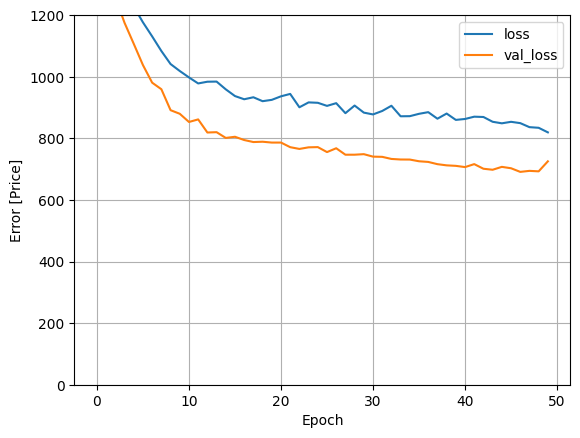

In [212]:
plot_loss(history)

In [213]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 766.0635


777.799560546875

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.